In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/top-spotify-songs-2023/spotify-2023.csv",encoding='latin1')

In [4]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Since streams, deezer playlists and shazam are supposed to be numbers let us see the sample and then as per documentation convert it to integer type

In [6]:
df[['streams', 'in_deezer_playlists', 'in_shazam_charts']].head()


,streams,in_deezer_playlists,in_shazam_charts
0,141381703,45,826
1,133716286,58,382
2,140003974,91,949
3,800840817,125,548
4,303236322,87,425


In [7]:
for col in df.select_dtypes(include="object").columns:
    try:
        pd.to_numeric(df[col])
        print(f"{col} — convertable to numeric")
    except:
        print(f"{col} not convertible")

track_name not convertible
artist(s)_name not convertible
streams not convertible
in_deezer_playlists not convertible
in_shazam_charts not convertible
key not convertible
mode not convertible


Trying to convert the few object type data columns to numeric value to see if it throws error. Likely there is some string or commas in the three columns mentioned before


In [8]:
# Remove commas and convert to integer
df['streams'] = pd.to_numeric(df['streams'].astype(str).str.replace(',', ''), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].astype(str).str.replace(',', ''), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].astype(str).str.replace(',', ''), errors='coerce')


In [9]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [10]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [11]:
total_missing_values=df.isna().sum().sum()
print(f"Total Missing Values — {total_missing_values}")

Total Missing Values — 146


In [12]:
df[df.isna().any(axis=1)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1.316856e+09,300,...,118,NaN,Major,71,65,68,6,0,3,7
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2.513188e+09,403,...,174,F#,Minor,52,66,73,34,0,31,6
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,3.054688e+07,80,...,78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1.297026e+09,24,...,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,1.231224e+08,22,...,120,NaN,Major,81,63,68,11,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,After LIKE,IVE,1,2022,8,22,767,12,2.655488e+08,20,...,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,2.445851e+08,102,...,137,NaN,Major,74,71,89,24,61,15,5
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,12,18,668,1,1.404303e+08,0,...,125,D#,Minor,49,13,74,0,0,9,4
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,1.873398e+08,6,...,110,NaN,Major,48,15,31,80,22,12,4


In [13]:
any_missing_values=df.isna().any()
print (any_missing_values)

track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                  True
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool


In [14]:
missing_value_count = df.isnull().sum()
for column, has_missing in missing_value_count.items():
    if has_missing:
        percentage=round(missing_value_count[column]/len(df),2)*100
        print(f"{column} has {percentage} % missing values")
        

streams has 0.0 % missing values
in_shazam_charts has 5.0 % missing values
key has 10.0 % missing values


Since missing values in columns such as 'key' etc can't be imputed with median as it is categorical we will impute it with 'Unknown' keeping a significant 10% of data for analysis

In [15]:
# Impute numeric missing with 0 to show insignificance
df['in_shazam_charts'].fillna(0, inplace=True)
# Impute categorical missing
df['key'].fillna('Unknown', inplace=True)

/tmp/ipykernel_35/555087928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_shazam_charts'].fillna(0, inplace=True)
/tmp/ipykernel_35/555087928.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [16]:
nan_streams = df[df['streams'].isna()]

In [17]:
print("Number of NaN values in 'streams':", df['streams'].isna().sum())

# Display the rows with missing 'streams' if any
print(nan_streams)

Number of NaN values in 'streams': 1
                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts  streams  in_apple_playlists  ...  bpm  key   mode  \
574                  0      NaN                  16  ...  110    A  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
574              53         75       69              7                   0   

     liveness_%  speechiness_%  
574          17              3  

[1 rows x 24 columns]


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [18]:
df.dropna(subset=['streams'], inplace=True)

In [19]:
#checking for duplicates based on track name and artists
df.duplicated(subset=['track_name', 'artist(s)_name']).sum()

4

In [20]:
df.drop_duplicates(subset=['track_name', 'artist(s)_name'], keep='first', inplace=True)


## Feature Engineering

In [21]:
# Creating streams per playlist
df['streams_per_playlist']=df['streams']/df['in_spotify_playlists']

In [22]:
df['energy_level'] = pd.cut(df['energy_%'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])
df['danceability_bucket'] = pd.cut(df['danceability_%'], bins=3, labels=['Low', 'Medium', 'High'])

In [23]:
df['artist_song_count'] = df.groupby('artist(s)_name')['track_name'].transform('count')


In [24]:
df['mode_encoded'] = df['mode'].map({'Major': 1, 'Minor': 0})

# Top 10 tracks with the most streams

In [25]:
top_10_track = df.groupby('track_name')['streams'].sum().nlargest(10)

# Filter original DataFrame using the track names (from index)
top_tracks_df = df[df['track_name'].isin(top_10_track.index)]

# Select relevant columns and remove duplicates
top_10_tracks_bystreams = top_tracks_df[['track_name', 'artist(s)_name', 'streams']].drop_duplicates()

top_10_tracks_bystreams['track_name'] = top_10_tracks_bystreams['track_name'].apply(lambda x: x[:20] + '...' if len(x) > 30 else x)

# Sort the result by streams descending
top_10_tracks_bystreams = top_10_tracks_bystreams.sort_values(by='streams', ascending=False)

# Displaying the top ten tracks by by number of streams
print(top_10_tracks_bystreams)

                    track_name                artist(s)_name       streams
55             Blinding Lights                    The Weeknd  3.703895e+09
179               Shape of You                    Ed Sheeran  3.562544e+09
86           Someone You Loved                 Lewis Capaldi  2.887242e+09
620               Dance Monkey                   Tones and I  2.864792e+09
41     Sunflower - Spider-M...         Post Malone, Swae Lee  2.808097e+09
162                  One Dance           Drake, WizKid, Kyla  2.713922e+09
84   STAY (with Justin Bieber)  Justin Bieber, The Kid Laroi  2.665344e+09
140                   Believer               Imagine Dragons  2.594040e+09
725                     Closer      The Chainsmokers, Halsey  2.591224e+09
48                     Starboy         The Weeknd, Daft Punk  2.565530e+09


## Top 10 tracks by top 10 artists

In [26]:
top_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(10).index
print(top_artists)

Index(['Taylor Swift', 'Ed Sheeran', 'The Weeknd', 'Harry Styles', 'Bad Bunny',
       'Olivia Rodrigo', 'Eminem', 'Bruno Mars', 'Arctic Monkeys',
       'Imagine Dragons'],
      dtype='object', name='artist(s)_name')


In [27]:
# Step 4: Filter songs by top artists
top_artist_df = df[df['artist(s)_name'].isin(top_artists)]

In [28]:
top_tracks = top_artist_df[['track_name', 'artist(s)_name', 'streams']].drop_duplicates()
top_10_tracks = top_tracks.sort_values(by='streams', ascending=False).head(10)

# Step 6: Displaying the top ten tracks by top ten artisits
print(top_10_tracks)

            track_name   artist(s)_name       streams
55     Blinding Lights       The Weeknd  3.703895e+09
179       Shape of You       Ed Sheeran  3.562544e+09
140           Believer  Imagine Dragons  2.594040e+09
138            Perfect       Ed Sheeran  2.559529e+09
14           As It Was     Harry Styles  2.513188e+09
127   Watermelon Sugar     Harry Styles  2.322580e+09
685  Thinking Out Loud       Ed Sheeran  2.280566e+09
761         Photograph       Ed Sheeran  2.236668e+09
325          The Hills       The Weeknd  1.947372e+09
513           good 4 u   Olivia Rodrigo  1.887040e+09


### Top 10 most frequent collab artists 

In [29]:
# Filter songs with more than one artist
collabs = df[df['artist_count'] > 1]

# Create a list to store individual artists from collaborations
individual_collab_artists = []

# For each collaboration track, extract and count individual artists
for artists in collabs['artist(s)_name']:
    # Assuming artists are separated by commas
    artist_list = [artist.strip() for artist in artists.split(',')]
    individual_collab_artists.extend(artist_list)

# Count occurrences of each artist in collaborations
from collections import Counter
artist_collab_counts = Counter(individual_collab_artists)

# Get the top 10 collaborating artists and their counts
top_10_collaborators = artist_collab_counts.most_common(10)

# Print the top 10 collaborating artists and their counts
print("Top 10 collaborating artists:")
for artist, count in top_10_collaborators:
    print(f"{artist}: {count} collaborations")

# Get just the artist names for filtering
top_collab_artists = [artist for artist, count in top_10_collaborators]

# Filter the original dataframe for tracks featuring any of the top collaborating artists
top_collab_tracks = df[df['artist(s)_name'].apply(lambda x: any(artist in x for artist in top_collab_artists))]

# Print the number of tracks featuring the top collaborating artists
print(f"\nTotal tracks featuring top collaborators: {len(top_collab_tracks)}")


Top 10 collaborating artists:
Bad Bunny: 21 collaborations
The Weeknd: 15 collaborations
Drake: 15 collaborations
Peso Pluma: 14 collaborations
21 Savage: 14 collaborations
Metro Boomin: 14 collaborations
Feid: 13 collaborations
Kendrick Lamar: 11 collaborations
Bizarrap: 10 collaborations
Rauw Alejandro: 10 collaborations

Total tracks featuring top collaborators: 188


### Top 10 songs with the most artists by count

In [30]:
top_collab_tracks = df.sort_values(by='artist_count', ascending=False)

# Step 2: Select top N tracks with most artists (let's say top 10)
top_collab_tracks = top_collab_tracks[['track_name', 'artist(s)_name', 'artist_count']].drop_duplicates().head(10)

# Optional: Truncate long track names for clean output
top_collab_tracks['track_name'] = top_collab_tracks['track_name'].str.slice(0, 30)
top_collab_tracks['artist(s)_name'] = top_collab_tracks['artist(s)_name'].str.slice(0, 20)

# Step 3: Display the result
print(top_collab_tracks)

                         track_name        artist(s)_name  artist_count
35                  Los del Espacio  Big One, Duki, Lit K             8
642                        Se Le Ve  Arcangel, De La Ghet             8
506       We Don't Talk About Bruno  Adassa, Mauro Castil             7
667  Cayï¿½ï¿½ La Noche (feat. Cruz  Quevedo, La Pantera,             7
393               Jhoome Jo Pathaan  Arijit Singh, Vishal             6
402  Besharam Rang (From "Pathaan")  Vishal-Shekhar, Shil             6
759  Nobody Like U - From "Turning   Jordan Fisher, Josh              6
238  Link Up (Metro Boomin & Don To  WizKid, Toian, Metro             5
864                ULTRA SOLO REMIX  De La Ghetto, Feid,              5
201  Angel Pt 1 (feat. Jimin of BTS  Kodak Black, NLE Cho             5


### Top 10 artists with the most number of tracks

In [31]:
# Count how many times each artist appears in the dataset
top_artists_by_count = df['artist(s)_name'].value_counts().head(10)

# Display top 10 artists who appear most frequently
print(top_artists_by_count)


artist(s)_name
Taylor Swift        34
The Weeknd          21
SZA                 19
Bad Bunny           19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: int64


In [32]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Compute correlation
correlation = df[['streams', 'energy_%', 'danceability_%']].corr()

print(correlation)


                 streams  energy_%  danceability_%
streams         1.000000 -0.026376       -0.105620
energy_%       -0.026376  1.000000        0.197837
danceability_% -0.105620  0.197837        1.000000


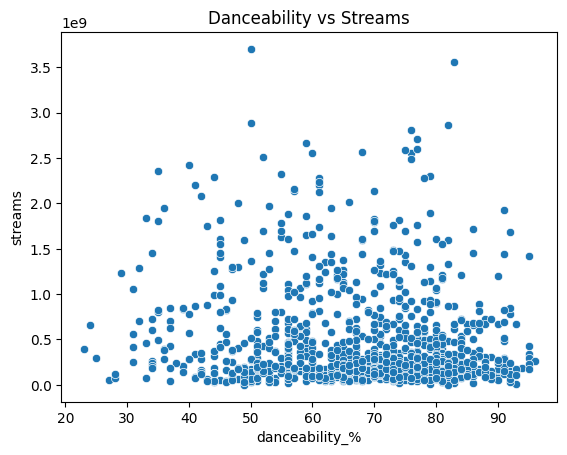

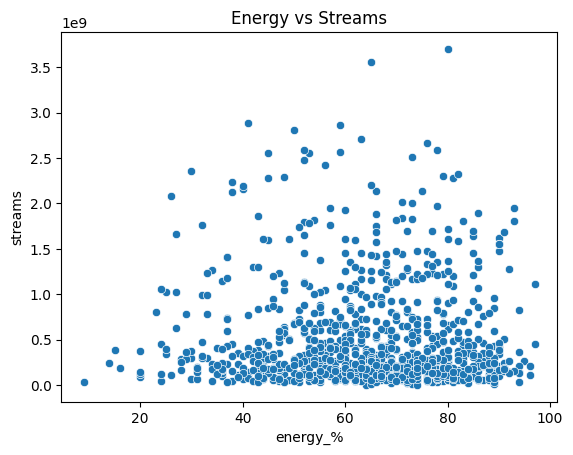

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='danceability_%', y='streams')
plt.title('Danceability vs Streams')
plt.show()

sns.scatterplot(data=df, x='energy_%', y='streams')
plt.title('Energy vs Streams')
plt.show()


Most songs have less than 500 million streams

Only a small handful of songs have streams above 2 billion (top outliers)

In [34]:
# Group by mode and calculate average streams
mode_comparison = df.groupby('mode')['streams'].mean()

print(mode_comparison)


mode
Major    5.351232e+08
Minor    4.853526e+08
Name: streams, dtype: float64


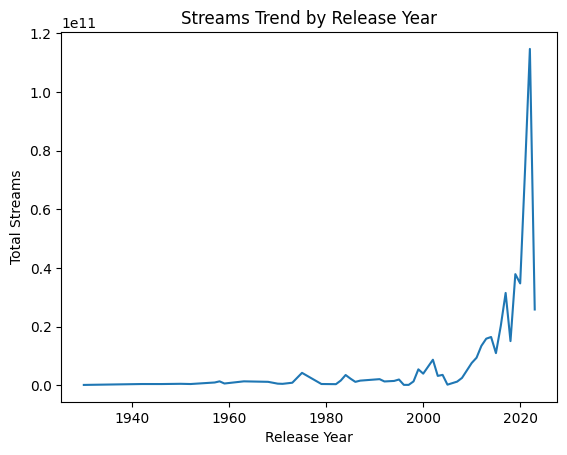

In [35]:
# Group by year and sum total streams
streams_by_year = df.groupby('released_year')['streams'].sum()

# Plot
streams_by_year.plot(kind='line', title='Streams Trend by Release Year')
plt.ylabel('Total Streams')
plt.xlabel('Release Year')
plt.show()


### Newer songs dominate the streaming numbers heavily.
### Very low total streams for songs from the 1930s to 2000s.
### Even very old popular songs do not collectively have large stream counts today.

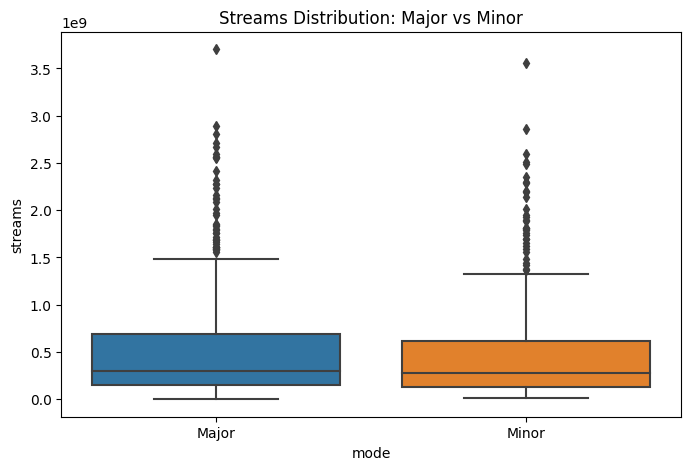

In [36]:
# Strip and clean mode column if needed
df['mode'] = df['mode'].str.strip()

# Boxplot comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='mode', y='streams')
plt.title("Streams Distribution: Major vs Minor")
plt.show()


#### The overlap between distributions shows that mode alone doesn't strongly determine stream success.


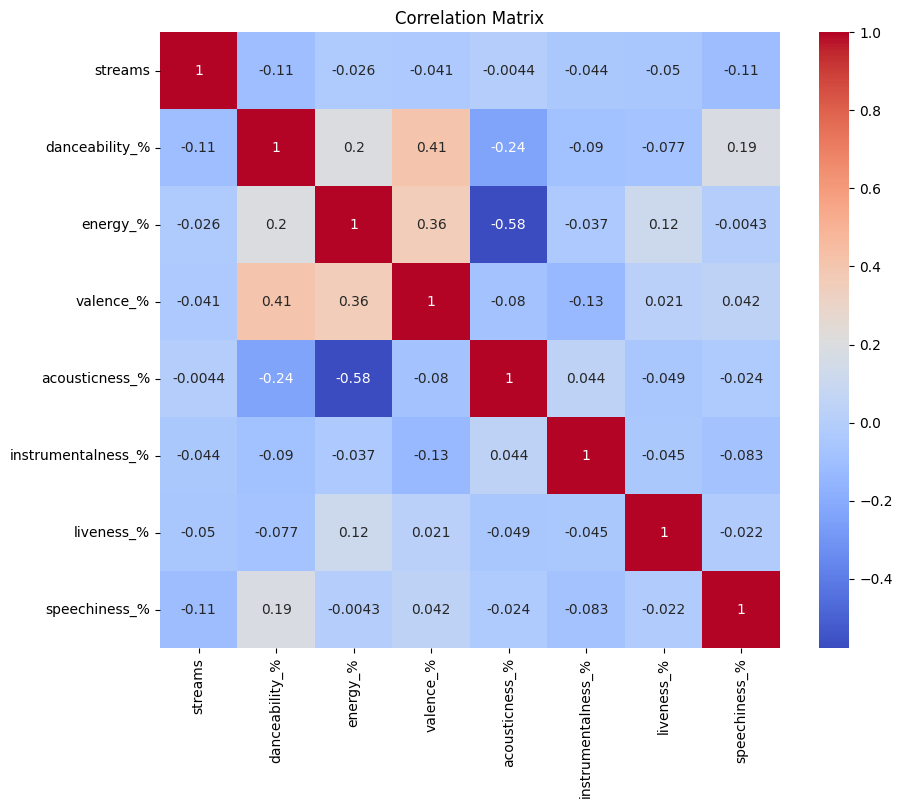

In [37]:
# Ensure streams is float
df['streams'] = df['streams'].astype(float)

# Select relevant columns
corr_cols = ['streams', 'danceability_%', 'energy_%', 'valence_%', 
             'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Compute and plot
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


None of the audio features show a strong correlation with streams.

Streaming success is likely influenced more by external factors (e.g., artist popularity, playlist placement, marketing) than by these audio characteristics alone

In [38]:
df_features = pd.get_dummies(df, columns=['key', 'mode'], prefix=['key', 'mode'])


In [39]:
df_features.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_Unknown,mode_Major,mode_Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,False,False,False,False,False,False,False,False,True,False
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,False,False,False,False,False,False,False,False,True,False
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,False,False,False,True,False,False,False,False,True,False
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,False,False,False,False,False,False,False,False,True,False
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,False,False,False,False,False,False,False,False,False,True


In [40]:
df_da = df_features.drop(columns=['track_name','artist(s)_name','artist_count','released_year','released_month','released_day','in_spotify_playlists','in_apple_charts','in_apple_playlists','in_spotify_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts','streams_per_playlist','energy_level','danceability_bucket'])
df_da.head()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,artist_song_count,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_Unknown,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,1,...,False,False,False,False,False,False,False,False,True,False
1,133716286.0,92,71,61,74,7,0,10,4,1,...,False,False,False,False,False,False,False,False,True,False
2,140003974.0,138,51,32,53,17,0,31,6,7,...,False,False,False,True,False,False,False,False,True,False
3,800840817.0,170,55,58,72,11,0,11,15,34,...,False,False,False,False,False,False,False,False,True,False
4,303236322.0,144,65,23,80,14,63,11,6,19,...,False,False,False,False,False,False,False,False,False,True


In [41]:
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness' 
}
df_da.rename(columns=re_col, inplace=True)
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,artist_song_count,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_Unknown,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,1,...,False,False,False,False,False,False,False,False,True,False
1,133716286.0,92,71,61,74,7,0,10,4,1,...,False,False,False,False,False,False,False,False,True,False
2,140003974.0,138,51,32,53,17,0,31,6,7,...,False,False,False,True,False,False,False,False,True,False
3,800840817.0,170,55,58,72,11,0,11,15,34,...,False,False,False,False,False,False,False,False,True,False
4,303236322.0,144,65,23,80,14,63,11,6,19,...,False,False,False,False,False,False,False,False,False,True


In [42]:
df_da.describe()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,artist_song_count,mode_encoded
count,9.480000e+02,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,5.140179e+08,122.473629,66.966245,51.376582,64.261603,27.159283,1.568565,18.184599,10.154008,4.672996,0.575949
std,5.679277e+08,28.047409,14.644716,23.519759,16.585738,26.025796,8.410065,13.706098,9.933332,7.631745,0.494459
min,2.762000e+03,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000
25%,1.411439e+08,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,1.000000,0.000000
50%,2.876903e+08,120.500000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,1.000000,1.000000
75%,6.729425e+08,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,23.250000,11.000000,3.000000,1.000000
max,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,34.000000,1.000000


In [43]:
binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

for column in binary_columns:
    df_da[column] = df_da[column].astype(int) 
print(df_da.head())

       streams  bpm  danceability  valence  energy  acousticness  \
0  141381703.0  125            80       89      83            31   
1  133716286.0   92            71       61      74             7   
2  140003974.0  138            51       32      53            17   
3  800840817.0  170            55       58      72            11   
4  303236322.0  144            65       23      80            14   

   instrumentalness  liveness  speechiness  artist_song_count  ...  key_D  \
0                 0         8            4                  1  ...      0   
1                 0        10            4                  1  ...      0   
2                 0        31            6                  7  ...      0   
3                 0        11           15                 34  ...      0   
4                63        11            6                 19  ...      0   

   key_D#  key_E  key_F  key_F#  key_G  key_G#  key_Unknown  mode_Major  \
0       0      0      0       0      0       0       

In [44]:
df_da.head()

,streams,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,artist_song_count,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_Unknown,mode_Major,mode_Minor
0,141381703.0,125,80,89,83,31,0,8,4,1,...,0,0,0,0,0,0,0,False,1,0
1,133716286.0,92,71,61,74,7,0,10,4,1,...,0,0,0,0,0,0,0,False,1,0
2,140003974.0,138,51,32,53,17,0,31,6,7,...,0,0,0,1,0,0,0,False,1,0
3,800840817.0,170,55,58,72,11,0,11,15,34,...,0,0,0,0,0,0,0,False,1,0
4,303236322.0,144,65,23,80,14,63,11,6,19,...,0,0,0,0,0,0,0,False,0,1


In [45]:
df_da.isna().sum()

streams              0
bpm                  0
danceability         0
valence              0
energy               0
acousticness         0
instrumentalness     0
liveness             0
speechiness          0
artist_song_count    0
mode_encoded         0
key_A                0
key_A#               0
key_B                0
key_C#               0
key_D                0
key_D#               0
key_E                0
key_F                0
key_F#               0
key_G                0
key_G#               0
key_Unknown          0
mode_Major           0
mode_Minor           0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

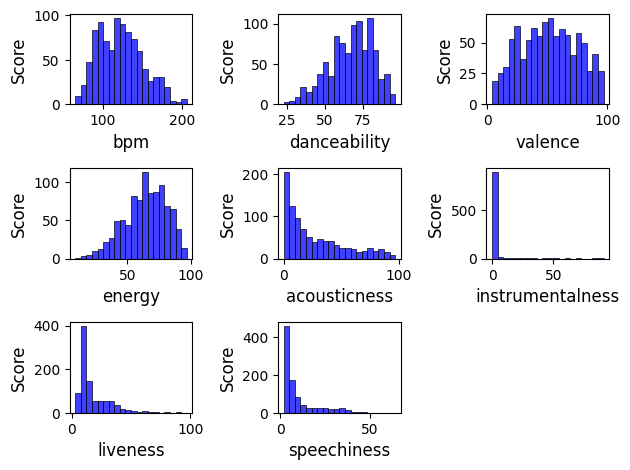

In [46]:
columns_to_plot = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_da, x=column, bins=20, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()


acousticness: Right-skewed — many songs have low acousticness, meaning they're more electronically produced.

instrumentalness: Highly right-skewed — most tracks have low instrumentalness (i.e., they include vocals).

liveness: Right-skewed — most tracks are not recorded live.

speechiness: Right-skewed — most songs contain very little spoken word content.

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [48]:
# Example numeric features — adjust based on your dataset
features = ['streams', 'danceability_%', 'energy_%', 'valence_%', 'bpm','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']

# Scale them using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])


In [49]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df['cluster'] = clusters


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


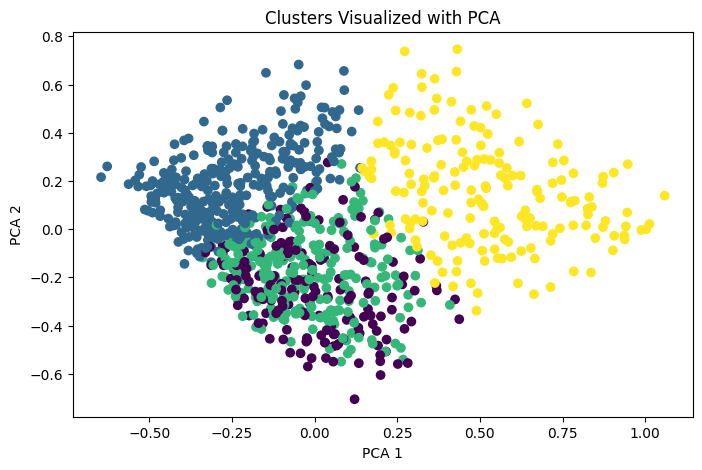

In [50]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [51]:
df.groupby('cluster')[features].mean()


,streams,danceability_%,energy_%,valence_%,bpm,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
cluster,,,,,,,,,
0,5.498110e+08,54.887006,69.564972,40.468927,151.966102,13.067797,3.096045,19.717514,9.536723
1,4.641113e+08,76.255193,72.370920,75.207715,122.145401,21.394659,0.587537,18.175074,9.922849
2,5.015429e+08,70.723735,64.416342,36.731518,104.789883,14.863813,1.147860,18.404669,12.334630
3,5.913583e+08,55.903955,43.293785,38.175141,119.282486,70.079096,2.519774,16.350282,8.045198


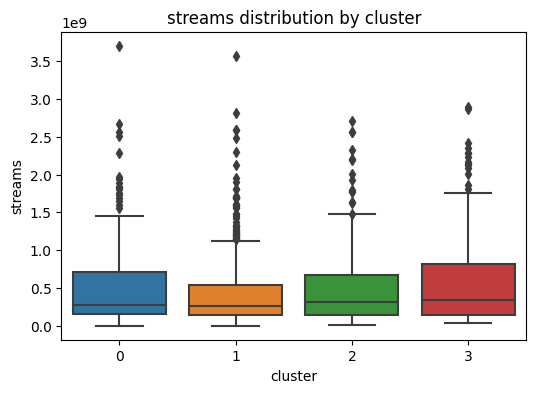

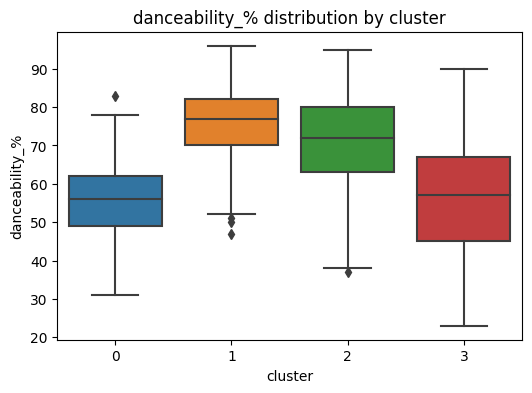

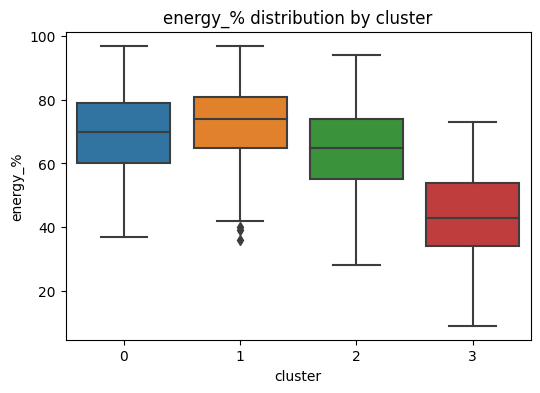

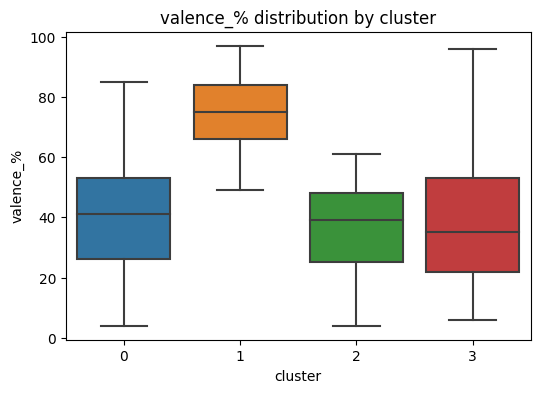

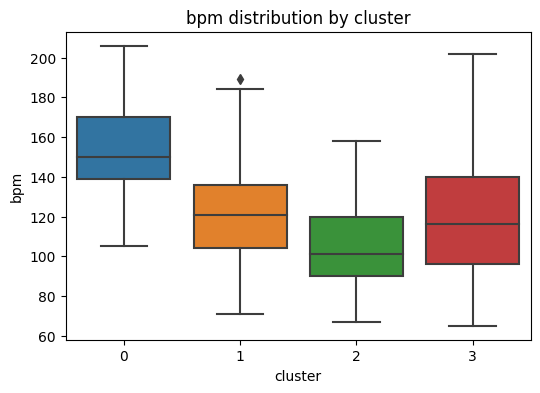

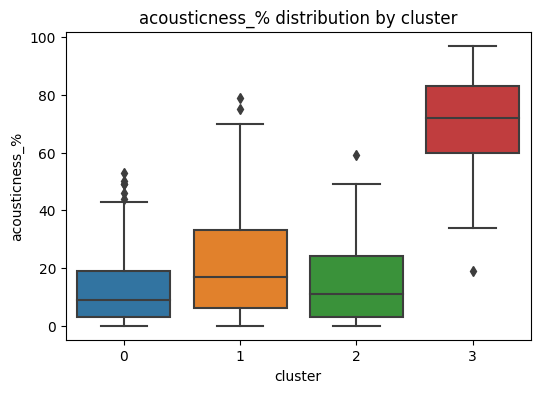

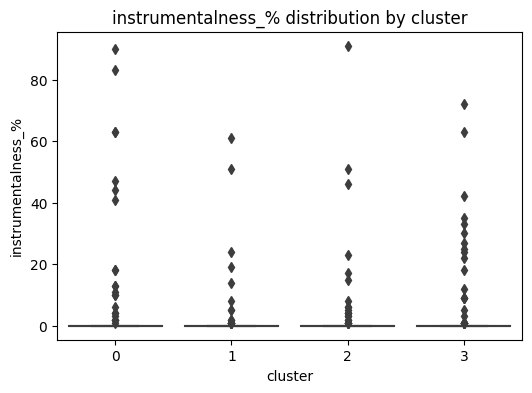

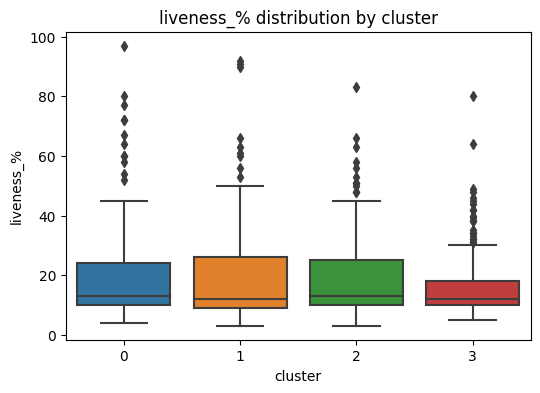

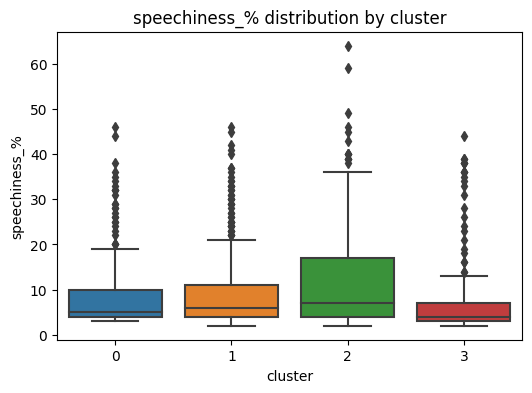

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'{feature} distribution by cluster')
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

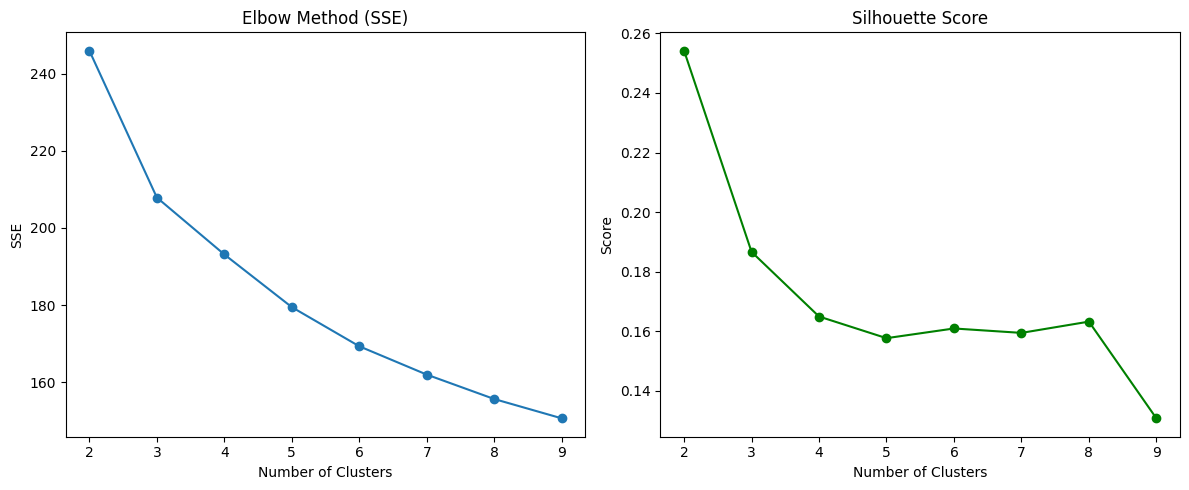

In [53]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
sil = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(df_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(df_scaled, preds))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), sse, marker='o')
plt.title('Elbow Method (SSE)')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), sil, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


4 seems to be the ideal clustering number as per elbow method

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

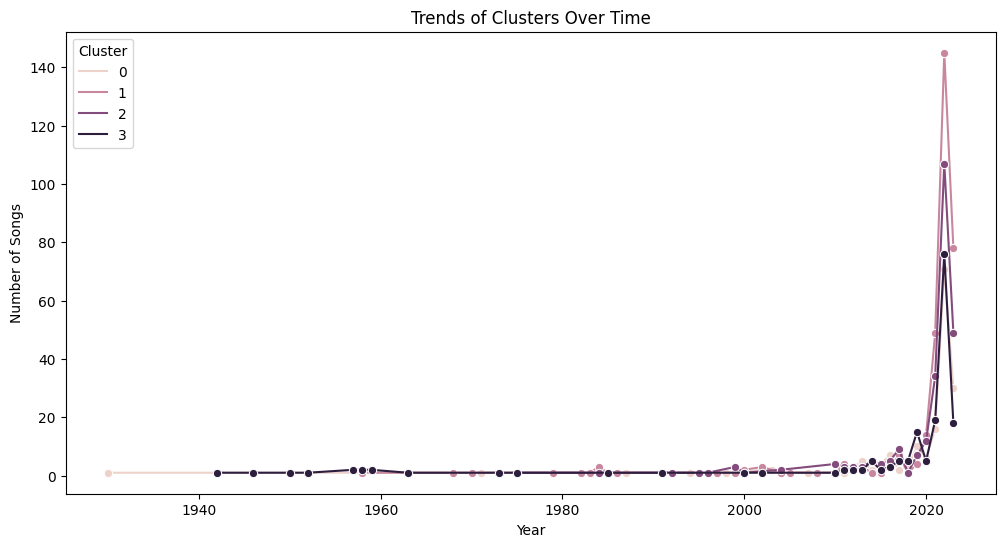

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and cluster
trend = df.groupby(['released_year', 'cluster']).size().reset_index(name='count')

# Plot trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend, x='released_year', y='count', hue='cluster', marker='o')
plt.title('Trends of Clusters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend(title='Cluster')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

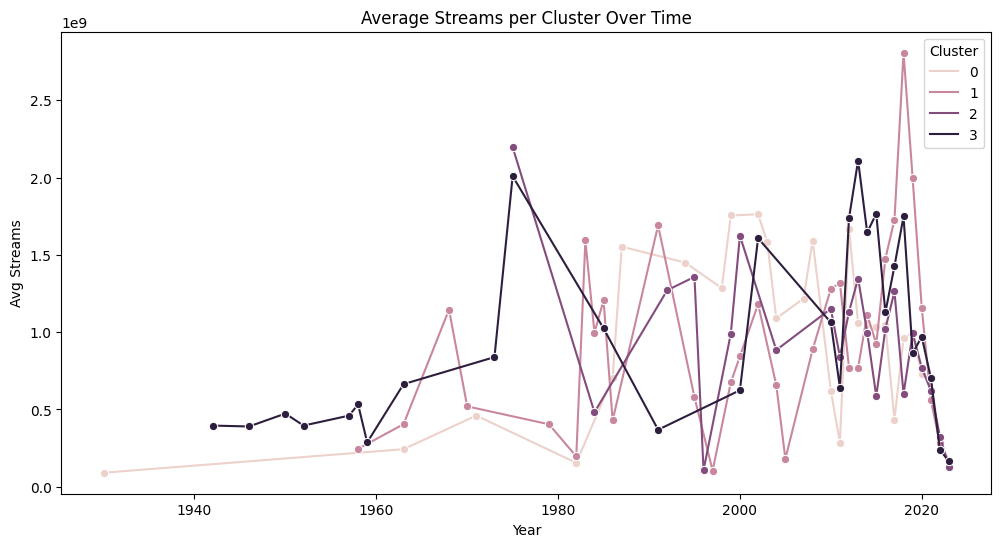

In [55]:
avg_streams = df.groupby(['released_year', 'cluster'])['streams'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_streams, x='released_year', y='streams', hue='cluster', marker='o')
plt.title('Average Streams per Cluster Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Streams')
plt.legend(title='Cluster')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

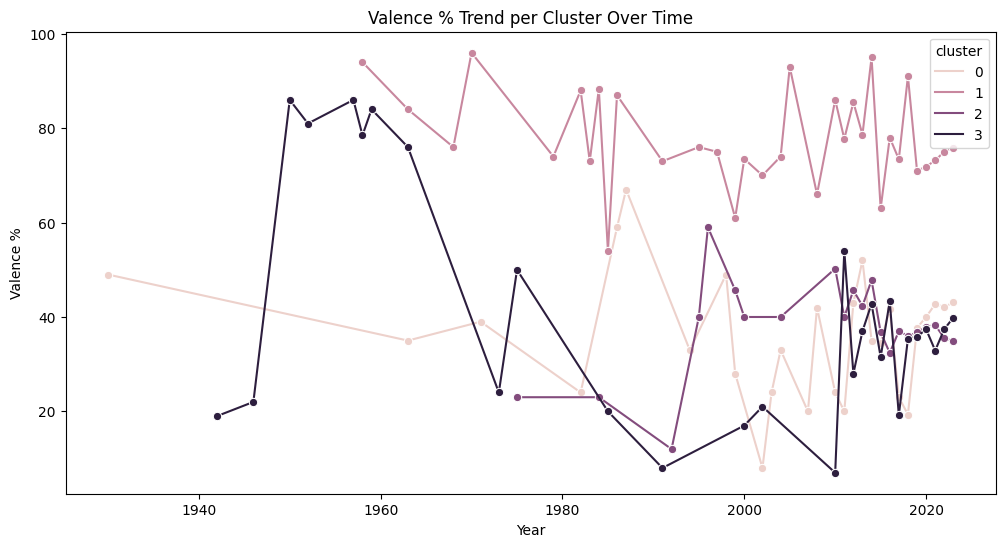

In [56]:
feature_trend = df.groupby(['released_year', 'cluster'])['valence_%'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=feature_trend, x='released_year', y='valence_%', hue='cluster', marker='o')
plt.title('Valence % Trend per Cluster Over Time')
plt.xlabel('Year')
plt.ylabel('Valence %')
plt.show()


In [57]:
df['decade'] = (df['released_year'] // 10) * 10
cluster_decade_summary = df.groupby(['decade', 'cluster'])[['danceability_%', 'energy_%', 'valence_%', 'streams']].mean()
print(cluster_decade_summary)

                danceability_%   energy_%  valence_%       streams
decade cluster                                                    
1930   0             65.000000  80.000000  49.000000  9.059852e+07
1940   3             29.500000  20.000000  20.500000  3.926817e+08
1950   1             69.000000  71.000000  94.000000  2.453509e+08
       3             63.625000  34.000000  83.000000  4.284289e+08
1960   0             34.000000  76.000000  35.000000  2.427671e+08
       1             63.500000  73.500000  80.000000  7.751959e+08
       3             24.000000  60.000000  76.000000  6.638321e+08
1970   0             33.000000  61.000000  39.000000  4.604928e+08
       1             62.500000  70.000000  85.000000  4.619870e+08
       2             41.000000  40.000000  23.000000  2.197011e+09
       3             43.500000  58.000000  37.000000  1.423841e+09
1980   0             55.000000  77.000000  50.000000  8.040087e+08
       1             67.571429  70.428571  81.000000  9.163677

In [58]:
# Get mean values of key features for each cluster
cluster_profiles = df.groupby('cluster')[['danceability_%', 'energy_%', 'valence_%', 
                                         'acousticness_%', 'instrumentalness_%',
                                         'liveness_%', 'speechiness_%', 'streams']].mean()

# Round to 2 decimal places for better readability
cluster_profiles = cluster_profiles.round(2)
print("Cluster Profiles:\n", cluster_profiles)

Cluster Profiles:
          danceability_%  energy_%  valence_%  acousticness_%  \
cluster                                                        
0                 54.89     69.56      40.47           13.07   
1                 76.26     72.37      75.21           21.39   
2                 70.72     64.42      36.73           14.86   
3                 55.90     43.29      38.18           70.08   

         instrumentalness_%  liveness_%  speechiness_%       streams  
cluster                                                               
0                      3.10       19.72           9.54  5.498110e+08  
1                      0.59       18.18           9.92  4.641113e+08  
2                      1.15       18.40          12.33  5.015429e+08  
3                      2.52       16.35           8.05  5.913583e+08  


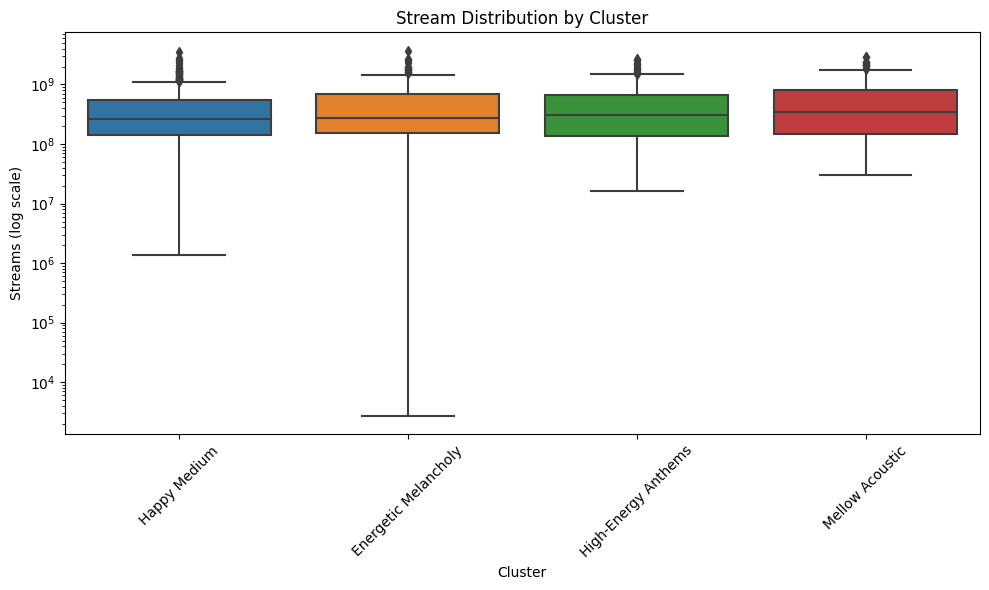

In [59]:
cluster_names = {
    0: "Energetic Melancholy",
    1: "Happy Medium",
    2: "High-Energy Anthems",
    3: "Mellow Acoustic"
}
# Note: Update these names based on actual cluster profiles in your data

# Add cluster names to the dataframe
df['cluster_name'] = df['cluster'].map(cluster_names)

# Visualize top genres in each cluster (if genre data is available)
# If not in the dataset already, we could create this from track characteristics

# ## 2. Popularity Analysis by Cluster

# Plot distribution of streams by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_name', y='streams', data=df)
plt.title('Stream Distribution by Cluster')
plt.yscale('log')  # Log scale for better visualization of stream distribution
plt.xlabel('Cluster')
plt.ylabel('Streams (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

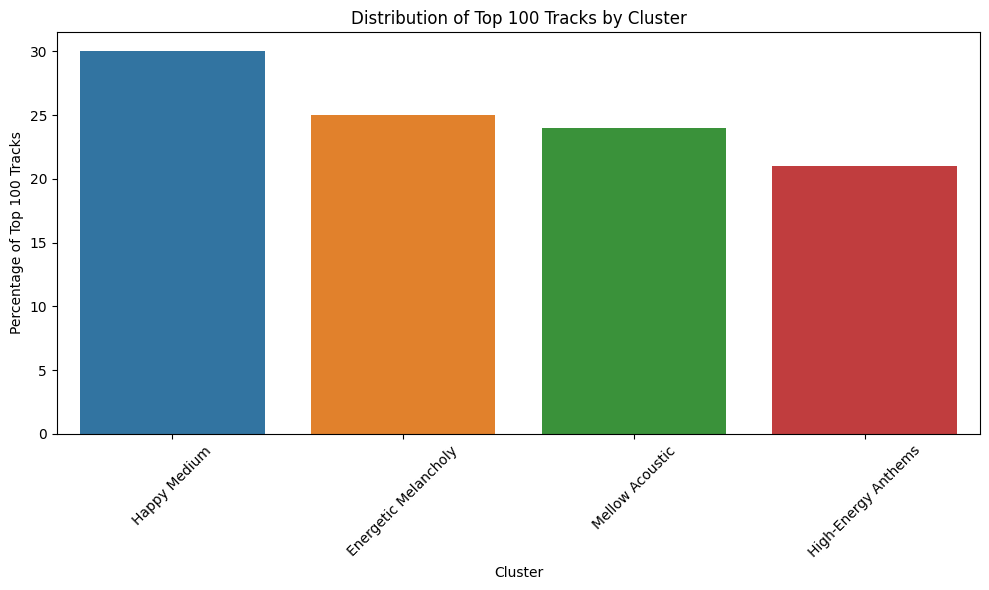

In [60]:
# Calculate percentage of top 100 tracks in each cluster
top_100_tracks = df.nlargest(100, 'streams')
top_100_distribution = top_100_tracks['cluster_name'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=top_100_distribution.index, y=top_100_distribution.values)
plt.title('Distribution of Top 100 Tracks by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Top 100 Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_35/80860001.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_streams = df.groupby('season')['streams'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


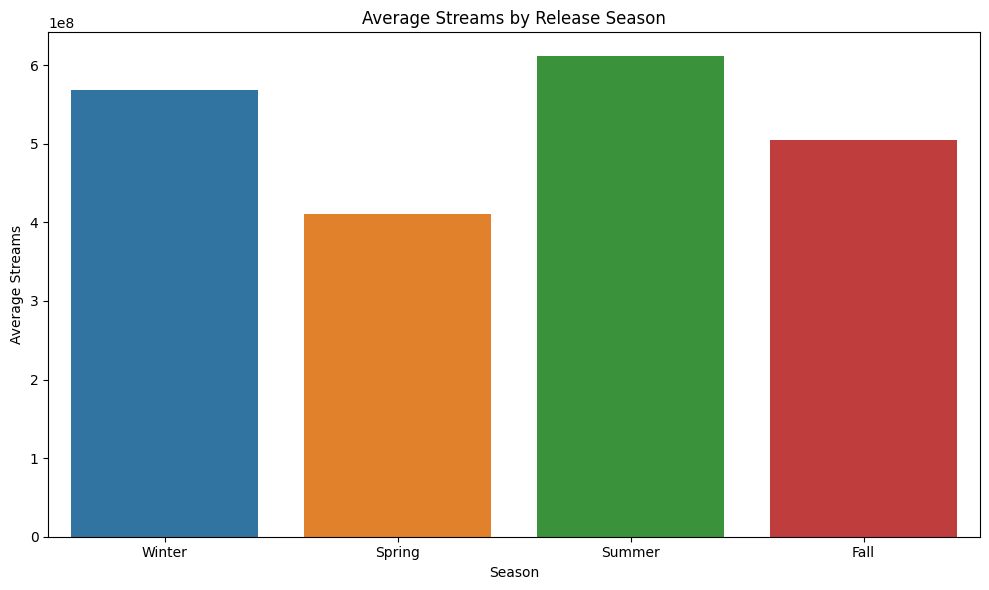

In [61]:
# ## 3. Seasonal Analysis

# Extract month from released_month and analyze popularity by season
df['season'] = pd.cut(
    df['released_month'], 
    bins=[0, 3, 6, 9, 12], 
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    include_lowest=True
)

# Analyze streams by season
seasonal_streams = df.groupby('season')['streams'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='streams', data=seasonal_streams)
plt.title('Average Streams by Release Season')
plt.xlabel('Season')
plt.ylabel('Average Streams')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

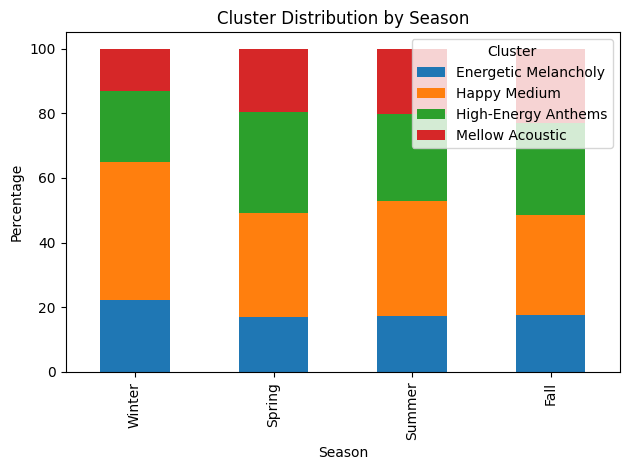

In [62]:
# Analyze how cluster distribution varies by season
season_cluster = pd.crosstab(df['season'], df['cluster_name'], normalize='index') * 100
plt.figure(figsize=(12, 7))
season_cluster.plot(kind='bar', stacked=True)
plt.title('Cluster Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

High-Energy Anthems Dominate Summer

Summer shows the highest proportion of "High-Energy Anthems" (the green segment)
This aligns with the typical association of summer with upbeat, danceable tracks



## Business Recommendations

Release Timing: Artists with "Mellow Acoustic" tracks should consider fall releases to align with seasonal preferences, while "High-Energy Anthems" would benefit from summer releases.

Playlist Curation: Streaming platforms should adjust featured playlist compositions seasonally, with more energetic content in summer and more acoustic, reflective content in fall.

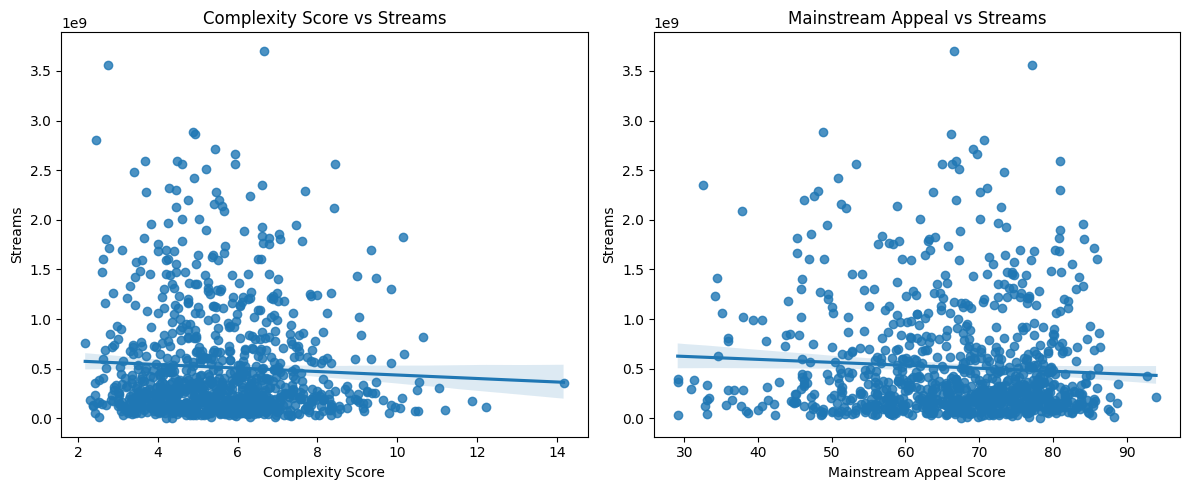

In [63]:
# Create complexity score (combination of multiple factors)
df['complexity_score'] = (
    df['bpm'] / 60 +  # Faster songs are more complex
    df['speechiness_%'] / 10 +  # More lyrics add complexity
    (100 - df['valence_%']) / 20 +  # Less happy songs tend to be more complex
    df['instrumentalness_%'] / 15  # More instrumental elements add complexity
)

# Create mainstream appeal score
df['mainstream_appeal'] = (
    df['danceability_%'] * 0.3 +
    df['energy_%'] * 0.3 +
    df['valence_%'] * 0.2 +
    (100 - df['acousticness_%']) * 0.1 +
    (100 - df['instrumentalness_%']) * 0.1
)

# Check correlation of new scores with streams
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='complexity_score', y='streams', data=df)
plt.title('Complexity Score vs Streams')
plt.xlabel('Complexity Score')
plt.ylabel('Streams')

plt.subplot(1, 2, 2)
sns.regplot(x='mainstream_appeal', y='streams', data=df)
plt.title('Mainstream Appeal vs Streams')
plt.xlabel('Mainstream Appeal Score')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

In [64]:
# Calculate correlation with streams
print("Correlation of Complexity Score with Streams:", 
      df['complexity_score'].corr(df['streams']))
print("Correlation of Mainstream Appeal with Streams:", 
      df['mainstream_appeal'].corr(df['streams']))

Correlation of Complexity Score with Streams: -0.052500537971777006
Correlation of Mainstream Appeal with Streams: -0.06242735451819018


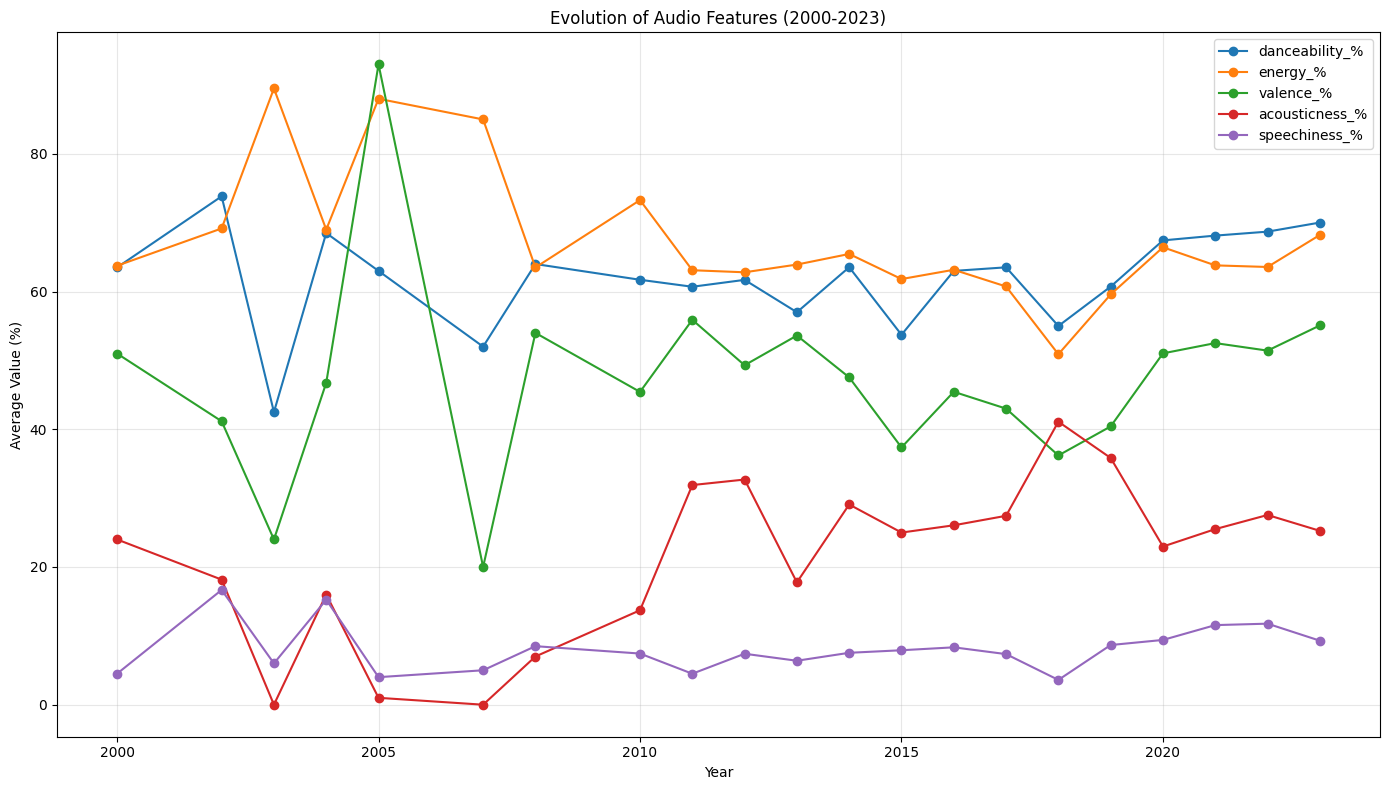

In [65]:
# Create evolving trends visualization by year
plt.figure(figsize=(14, 8))
features_to_track = ['danceability_%', 'energy_%', 'valence_%', 
                     'acousticness_%', 'speechiness_%']

# Focus on more recent years with sufficient data (e.g., 2000-2023)
recent_years = df[df['released_year'] >= 2000]
yearly_trends = recent_years.groupby('released_year')[features_to_track].mean()

# Plot trends of multiple features
for feature in features_to_track:
    plt.plot(yearly_trends.index, yearly_trends[feature], marker='o', label=feature)

plt.title('Evolution of Audio Features (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Average Value (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Valence (green line): This emotional positivity metric shows dramatic fluctuations, with an exceptional peak near 95% in 2005, followed by a sharp drop to 20%.

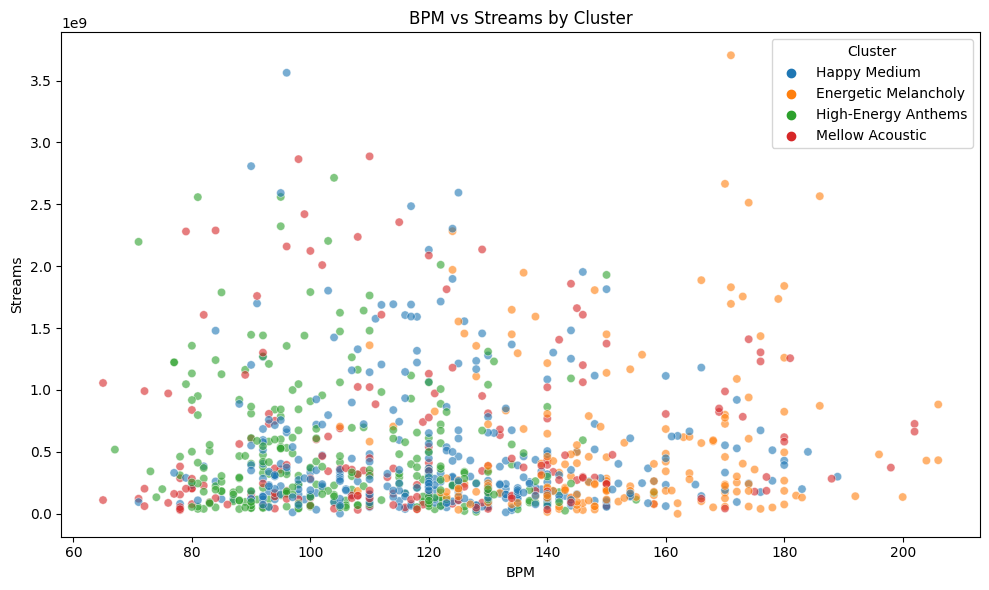

In [66]:
#6. BPM Analysis

# Analyze relationship between BPM and streams
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bpm', y='streams', hue='cluster_name', data=df, alpha=0.6)
plt.title('BPM vs Streams by Cluster')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

/tmp/ipykernel_35/4215955986.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bpm_success = df.groupby('bpm_range')['streams'].agg(['mean', 'median', 'count']).reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


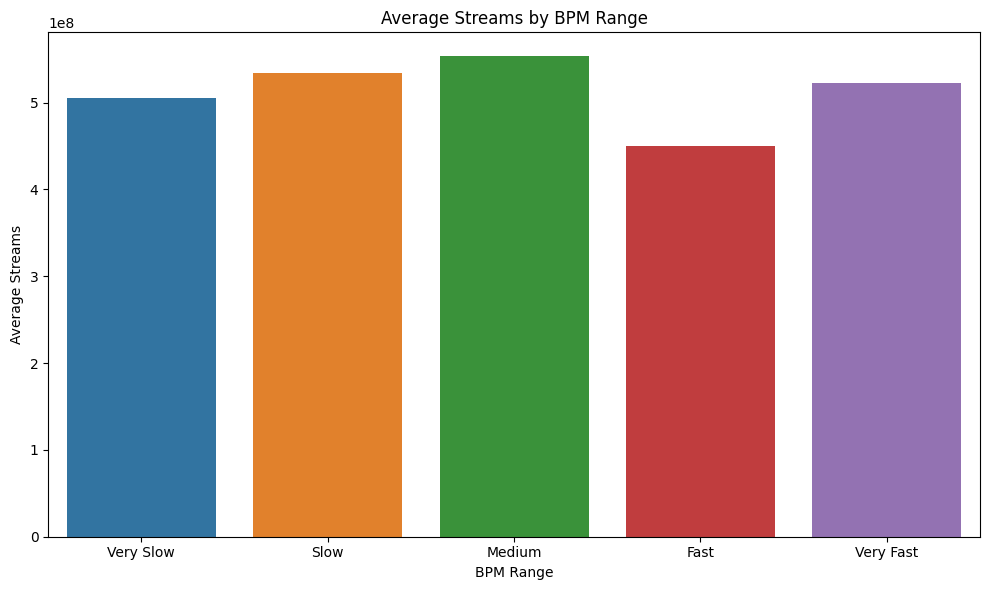

In [67]:
# Find optimal BPM ranges for streaming success
bpm_ranges = pd.cut(df['bpm'], bins=[0, 80, 100, 120, 140, 200], 
                    labels=['Very Slow', 'Slow', 'Medium', 'Fast', 'Very Fast'])
df['bpm_range'] = bpm_ranges

bpm_success = df.groupby('bpm_range')['streams'].agg(['mean', 'median', 'count']).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='bpm_range', y='mean', data=bpm_success)
plt.title('Average Streams by BPM Range')
plt.xlabel('BPM Range')
plt.ylabel('Average Streams')
plt.tight_layout()
plt.show()

In [68]:
# First get top artists by streams
top_20_artists = df.groupby('artist(s)_name')['streams'].sum().nlargest(20).reset_index()

# Calculate average audio features for each top artist
artist_features = df[df['artist(s)_name'].isin(top_20_artists['artist(s)_name'])].groupby('artist(s)_name')[
    ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].mean().reset_index()

# Merge with stream data
artist_analysis = pd.merge(top_20_artists, artist_features, on='artist(s)_name')

# Create a radar chart for top 5 artists
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(df, features, artist_col='artist(s)_name', top_n=5):
    # Get top N artists
    top_artists = df.nlargest(top_n, 'streams')[artist_col].values
    
    # Number of features
    N = len(features)
    
    # Create angles for each feature
    angles = [n / N * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Add feature labels
    plt.xticks(angles[:-1], features, size=12)
    
    # Draw chart for each artist
    colors = plt.cm.tab10(np.linspace(0, 1, top_n))
    
    for i, artist in enumerate(top_artists):
        values = df[df[artist_col] == artist][features].values.flatten().tolist()
        values += values[:1]  # Close the loop
        
        # Scale values to 0-1 for better visualization
        scaler = MinMaxScaler()
        values_array = np.array(values).reshape(-1, 1)
        scaled_values = scaler.fit_transform(values_array).flatten().tolist()
        
        ax.plot(angles, scaled_values, linewidth=2, linestyle='solid', label=artist, color=colors[i])
        ax.fill(angles, scaled_values, alpha=0.1, color=colors[i])
    
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Audio Features of Top Artists', size=20)
    plt.tight_layout()
    plt.show()


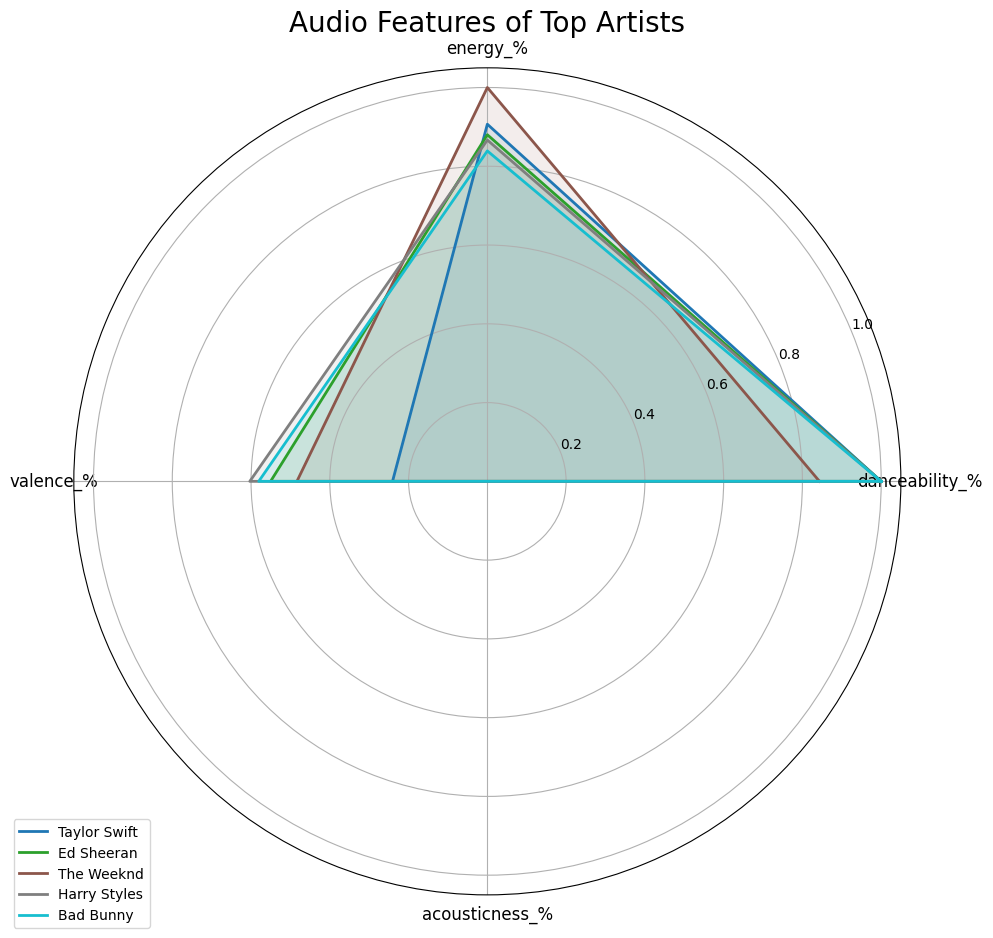

In [69]:
radar_chart(artist_analysis, ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%'])

### Acousticness variations: All artists show relatively lower acousticness percentages compared to other features, suggesting that popular streaming music tends to feature more electronic and produced elements rather than acoustic instruments.

The Weeknd shows the highest energy percentage among all artists, suggesting his music typically features more intensity, loudness, and dynamic range.

In [70]:
# Add more features including playlist and chart presence
features = [
    # Audio features you already have
    'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm',
    
    # Distribution features - likely very predictive
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_charts',
    
    # Temporal features
    'released_year', 'released_month', 'released_day',
    
    # Artist-related feature
    'artist_count'
]

# Convert any object columns to numeric where needed
# For example, the in_deezer_playlists column is an object but should be numeric
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

# Make sure streams is numeric for the log transformation
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

X = df[features]
y = np.log1p(df['streams'])  # Log transform for better distribution

# Fill any NaN values that might be introduced
X = X.fillna(X.median())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Feature importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Predicting Stream Success')
plt.tight_layout()
plt.show()

NameError: name 'train_test_split' is not defined

#### Spotify playlist inclusion absolutely dominates the chart with an importance score of around 0.64, dwarfing all other features. This confirms what your earlier scatter plot suggested - playlist presence is by far the strongest predictor of streaming success.

In [ ]:
# Analyze relationship between playlist inclusion and streams
plt.figure(figsize=(10, 6))
sns.regplot(x='in_spotify_playlists', y='streams', data=df)
plt.title('Spotify Playlists vs Streams')
plt.xlabel('Number of Spotify Playlists')
plt.ylabel('Streams')
plt.tight_layout()
plt.show()

## Key observations:

There's a clear linear relationship: songs with higher playlist presence generally achieve higher stream counts

The bulk of the data points are clustered in the lower left corner, indicating most songs appear on relatively few playlists (<10,000) and receive fewer than 500 million streams

There are several notable outliers at the top right that achieve exceptional streaming performance (3.5+ billion streams) while appearing on 30,000-40,000 playlists

In [ ]:
# Calculate effectiveness ratio (streams per playlist)
playlist_effectiveness = df.groupby('cluster_name')['streams_per_playlist'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster_name', y='streams_per_playlist', data=playlist_effectiveness)
plt.title('Average Streams per Playlist by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Streams per Playlist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot figure with proper specs for pie chart
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Danceability vs Energy", "Valence vs Acousticness", 
                   "Streams by Release Year", "Cluster Distribution"),
    specs=[[{"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "domain"}]]  # "domain" type for pie chart
)

# Add traces
fig.add_trace(
    go.Scatter(
        x=df['danceability_%'], 
        y=df['energy_%'],
        mode='markers',
        marker=dict(
            color=df['cluster'],
            colorscale='Viridis',
            showscale=True
        ),
        name='Danceability vs Energy'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df['valence_%'], 
        y=df['acousticness_%'],
        mode='markers',
        marker=dict(color=df['cluster'], colorscale='Viridis', showscale=False),
        name='Valence vs Acousticness'
    ),
    row=1, col=2
)

# Group by year
year_streams = df.groupby('released_year')['streams'].mean().reset_index()
fig.add_trace(
    go.Bar(
        x=year_streams['released_year'],
        y=year_streams['streams'],
        name='Avg Streams by Year'
    ),
    row=2, col=1
)

# Cluster distribution
cluster_dist = df['cluster_name'].value_counts()
fig.add_trace(
    go.Pie(
        labels=cluster_dist.index,
        values=cluster_dist.values,
        name='Cluster Distribution'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="Spotify Data Analysis Dashboard",
    height=800,
    showlegend=False
)

# To display in Jupyter notebook:
fig.show()

In [ ]:
# Create a comprehensive summary of the dataset
summary = {
    'Total Tracks': len(df),
    'Total Artists': df['artist(s)_name'].nunique(),
    'Average Streams': df['streams'].mean(),
    'Most Popular Track': df.loc[df['streams'].idxmax(), 'track_name'],
    'Most Popular Artist': df.groupby('artist(s)_name')['streams'].sum().idxmax(),
    'Average Track Danceability': df['danceability_%'].mean(),
    'Average Track Energy': df['energy_%'].mean(),
    'Average Track Valence': df['valence_%'].mean(),
    'Most Common Key': df['key'].mode()[0],
    'Average BPM': df['bpm'].mean()
}

# Display summary
for key, value in summary.items():
    print(f"{key}: {value}")

In [ ]:
# Select features for similarity calculation
sim_features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 
               'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']


In [ ]:
from scipy import stats

# Hypothesis 1: Major mode songs have more streams than minor mode songs
major_streams = df[df['mode'] == 'Major']['streams']
minor_streams = df[df['mode'] == 'Minor']['streams']

t_stat, p_value = stats.ttest_ind(major_streams, minor_streams, equal_var=False)
print("Hypothesis 1: Major vs Minor Mode Streams")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
print(f"Major mode average streams: {major_streams.mean():,.0f}")
print(f"Minor mode average streams: {minor_streams.mean():,.0f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}")
print()


In [ ]:
# Hypothesis 2: Songs with high danceability (>75%) have more streams
high_dance = df[df['danceability_%'] > 75]['streams']
low_dance = df[df['danceability_%'] <= 75]['streams']

t_stat, p_value = stats.ttest_ind(high_dance, low_dance, equal_var=False)
print("Hypothesis 2: High vs Low Danceability Streams")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
print(f"High danceability average streams: {high_dance.mean():,.0f}")
print(f"Lower danceability average streams: {low_dance.mean():,.0f}")
print(f"Conclusion: {'Statistically significant difference' if p_value < 0.05 else 'No statistically significant difference'}")
print()

Interestingly, the data indicates that songs with lower danceability actually have higher average streams (541,972,546) compared to songs with high danceability (455,084,092). This difference of approximately 87 million streams per song is statistically significant.

This finding might be somewhat counterintuitive if there was an expectation that more danceable songs would be more popular. Instead, it suggests that less danceable tracks tend to perform better in terms of streaming numbers in your dataset.

In [ ]:

# Create a simple content-based recommendation system
from sklearn.metrics.pairwise import cosine_similarity


# Create function to recommend similar songs
def get_recommendations(track_name, df, n=5):
    # Find the index of the given track
    track_idx = df[df['track_name'] == track_name].index[0]
    
    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(df[sim_features])
    
    # Get similarity scores for the track
    sim_scores = list(enumerate(similarity_matrix[track_idx]))
    
    # Sort by similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N similar tracks (excluding itself)
    sim_scores = sim_scores[1:n+1]
    track_indices = [i[0] for i in sim_scores]
    
    # Return similar tracks
    return df.iloc[track_indices][['track_name', 'artist(s)_name', 'streams']]

In [ ]:
popular_track = df.nlargest(10, 'streams')['track_name'].values[3]
print(f"Recommendations similar to '{popular_track}':")
print(get_recommendations(popular_track, df, n=5))

#### Recommended songs similar to the top ten songs by audio features. Change value of indexing to find similar tracks

In [ ]:
# 1. Basic Analysis: Average streams by key
key_streams = df.groupby('key')['streams'].agg(['mean', 'median', 'count']).reset_index()
key_streams = key_streams.sort_values(by='mean', ascending=False)


In [ ]:
print(key_streams)

In [ ]:
# Calculate confidence intervals for more robust analysis
def calculate_ci(data, confidence=0.95):
    """Calculate confidence interval for the mean"""
    n = len(data)
    mean = data.mean()
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n-1)
    return mean, mean-h, mean+h

In [ ]:
# Add confidence intervals to our analysis
key_ci = {}
for key_name in df['key'].unique():
    if key_name == 'Unknown':
        continue  # Skip unknown keys
    key_data = df[df['key'] == key_name]['streams']
    if len(key_data) >= 5:  # Only calculate CI if we have enough data
        mean, ci_lower, ci_upper = calculate_ci(key_data)
        key_ci[key_name] = {'mean': mean, 'ci_lower': ci_lower, 'ci_upper': ci_upper, 'count': len(key_data)}


In [ ]:
# Convert to DataFrame for easier handling
key_ci_df = pd.DataFrame(key_ci).T.reset_index()
key_ci_df.columns = ['key', 'mean', 'ci_lower', 'ci_upper', 'count']
key_ci_df = key_ci_df.sort_values(by='mean', ascending=False)

In [ ]:
## 2. Visual Analysis
plt.figure(figsize=(14, 8))
## Create plot with error bars for confidence intervals
plt.subplot(1, 2, 1)
sns.barplot(x='key', y='mean', data=key_ci_df)
plt.errorbar(x=range(len(key_ci_df)), 
             y=key_ci_df['mean'], 
             yerr=[(key_ci_df['mean'] - key_ci_df['ci_lower']), 
                   (key_ci_df['ci_upper'] - key_ci_df['mean'])],
             fmt='none', color='black', capsize=5)
plt.title('Average Streams by Musical Key with 95% Confidence Intervals')
plt.xlabel('Musical Key')
plt.ylabel('Average Streams')
plt.xticks(rotation=45)

In [ ]:
# Box plot to see distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='key', y='streams', data=df[df['key'] != 'Unknown'])
plt.title('Distribution of Streams by Musical Key')
plt.xlabel('Musical Key')
plt.ylabel('Streams')
plt.yscale('log')  # Log scale for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Statistical Analysis - ANOVA test
# Check if there are statistically significant differences between keys
keys_to_test = [k for k in df['key'].unique() if k != 'Unknown']
samples = [df[df['key'] == k]['streams'] for k in keys_to_test]
f_stat, p_value = stats.f_oneway(*samples)

print(f"ANOVA Test Results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant difference in streams between different musical keys.")
else:
    print("There is no statistically significant difference in streams between musical keys.")


In [ ]:
# 5. Mode Interaction: Do certain keys perform better in major or minor modes?
if 'mode' in df.columns:
    plt.figure(figsize=(14, 8))
    key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().reset_index()
    
    # Filter out Unknown and ensure we have both modes for meaningful comparison
    valid_keys = df.groupby(['key', 'mode']).size().unstack().dropna(how='any').index
    key_mode_streams = key_mode_streams[key_mode_streams['key'].isin(valid_keys)]
    
    sns.barplot(x='key', y='streams', hue='mode', data=key_mode_streams)
    plt.title('Average Streams by Key and Mode')
    plt.xlabel('Musical Key')
    plt.ylabel('Average Streams')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
    # Statistical test for interaction effect
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    
    # Use only valid keys and known modes
    interaction_data = df[(df['key'].isin(valid_keys)) & (df['key'] != 'Unknown') & 
                          (df['mode'].isin(['Major', 'Minor']))]
    
    # Log transform streams for better normality
    interaction_data['log_streams'] = np.log1p(interaction_data['streams'])
    
    # Create OLS model with interaction term
    model = ols('log_streams ~ C(key) + C(mode) + C(key):C(mode)', data=interaction_data).fit()
    anova_table = anova_lm(model, typ=2)
    
    print("\nANOVA for Key-Mode Interaction:")
    print(anova_table)
    
    interaction_p_value = anova_table.loc['C(key):C(mode)', 'PR(>F)']
    if interaction_p_value < 0.05:
        print("\nThere is a significant interaction between key and mode on streaming success.")
    else:
        print("\nNo significant interaction between key and mode on streaming success.")


In [ ]:
# Create a function to generate a comprehensive report
def generate_spotify_report(df):
    report = "# Spotify 2023 Data Analysis Report\n\n"
    
    # Overall statistics
    report += "## Overall Statistics\n\n"
    report += f"- Total Tracks Analyzed: {len(df):,}\n"
    report += f"- Total Unique Artists: {df['artist(s)_name'].nunique():,}\n"
    report += f"- Total Streams Analyzed: {df['streams'].sum():,.0f}\n"
    report += f"- Average Streams per Track: {df['streams'].mean():,.0f}\n\n"
    
    # Top performers
    report += "## Top Performers\n\n"
    top_track = df.loc[df['streams'].idxmax()]
    report += f"- Most Streamed Track: '{top_track['track_name']}' by {top_track['artist(s)_name']} ({top_track['streams']:,.0f} streams)\n"
    top_artist = df.groupby('artist(s)_name')['streams'].sum().nlargest(1)
    report += f"- Most Streamed Artist: {top_artist.index[0]} ({top_artist.values[0]:,.0f} total streams)\n\n"
    
    # Audio characteristics
    report += "## Audio Characteristics\n\n"
    report += f"- Average Danceability: {df['danceability_%'].mean():.1f}%\n"
    report += f"- Average Energy: {df['energy_%'].mean():.1f}%\n"
    report += f"- Average Valence (Positivity): {df['valence_%'].mean():.1f}%\n"
    report += f"- Average BPM: {df['bpm'].mean():.1f}\n\n"
    
    # Cluster insights
    report += "## Cluster Analysis\n\n"
    for cluster in sorted(df['cluster'].unique()):
        cluster_name = cluster_names.get(cluster, f"Cluster {cluster}")
        cluster_data = df[df['cluster'] == cluster]
        report += f"### {cluster_name}\n"
        report += f"- Number of Tracks: {len(cluster_data)} ({len(cluster_data)/len(df)*100:.1f}% of all tracks)\n"
        report += f"- Average Streams: {cluster_data['streams'].mean():,.0f}\n"
        report += f"- Defining Characteristics: "
        # Get top 3 distinguishing features
        cluster_avg = cluster_data[sim_features].mean()
        overall_avg = df[sim_features].mean()
        differences = ((cluster_avg - overall_avg) / overall_avg * 100).abs()
        top_features = differences.nlargest(3).index.tolist()
        
        for feature in top_features:
            direction = "higher" if cluster_avg[feature] > overall_avg[feature] else "lower"
            feature_name = feature.replace('_%', '').capitalize()
            report += f"{feature_name} ({direction}), "
        report = report[:-2] + "\n\n"  # Remove last comma and space
    
    # Year analysis
    report += "## Trends Over Time\n\n"
    recent_data = df[df['released_year'] >= 2010].groupby('released_year')['streams'].mean()
    trend = "increasing" if recent_data.iloc[-1] > recent_data.iloc[0] else "decreasing"
    report += f"- Streaming trend since 2010: {trend}\n"
    report += f"- Most productive year: {df['released_year'].value_counts().idxmax()} with {df['released_year'].value_counts().max()} tracks\n"
    report += f"- Year with highest average streams: {recent_data.idxmax()} ({recent_data.max():,.0f} average streams)\n\n"
    
    # Seasonal insights
    if 'season' in df.columns:
        season_avg = df.groupby('season')['streams'].mean()
        best_season = season_avg.idxmax()
        report += f"- Most successful release season: {best_season} ({season_avg[best_season]:,.0f} average streams)\n\n"
    
    return report

# Generate the report
report = generate_spotify_report(df)
print(report)